In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv("train.csv")

In [36]:
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [37]:
df.shape

(700, 2)

In [38]:
df.isnull().sum()

x    0
y    1
dtype: int64

In [39]:
df.dropna(axis=0, ignore_index=True, inplace = True)

In [40]:
df.isnull().sum()

x    0
y    0
dtype: int64

In [41]:
df.shape

(699, 2)

In [42]:
df['x'].head()

0    24.0
1    50.0
2    15.0
3    38.0
4    87.0
Name: x, dtype: float64

In [43]:
df['y'].head()

0    21.549452
1    47.464463
2    17.218656
3    36.586398
4    87.288984
Name: y, dtype: float64

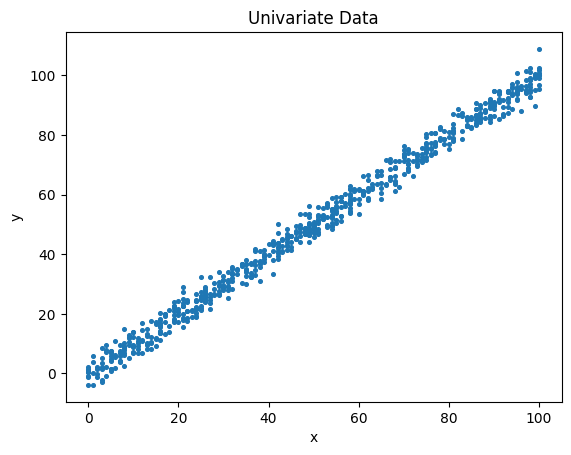

In [44]:
plt.scatter(df['x'], df['y'], s = 7)
plt.title("Univariate Data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [45]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    total_cost = 0
    for i in range(m):
        f_wb = w*x[i]+b
        total_cost += (f_wb-y[i])**2
    total_cost = total_cost /(2*m)
    return total_cost

In [67]:
w_init = 1
b_init = 2
result = compute_cost(df["x"], df["y"], w_init, b_init)
print(result)

6.085701102559542


In [50]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        dj_dw += (w*x[i]+b-y[i])*x[i]
        dj_db += (w*x[i]+b-y[i])
    dj_dw = dj_dw/m
    dj_db = dj_dw/m

    return dj_dw, dj_db

In [71]:
def gradient_descent(x, y, w, b, alpha, iteration, compute_cost, compute_gradient):
    m = x.shape[0]
    cost = []
    iterations = []

    for i in range(iteration):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w = w - (alpha*dj_dw)
        b = b - (alpha*dj_db)
        cost.append(compute_cost(x, y, w, b))
        iterations.append(i)

        if i%10==0:
            print(f"Iteration {i:4}: Cost {cost[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")

    return w, b, cost, iterations
        

In [72]:
w, b, cost, iterations = gradient_descent(df["x"], df["y"], w_init, b_init, 0.0001, 100, compute_cost, compute_gradient) 

Iteration    0: Cost 5.20e+00  dj_dw:  1.032e+02, dj_db:  1.476e-01   w:  9.897e-01, b: 1.99999e+00
Iteration   10: Cost 4.49e+00  dj_dw:  1.775e+00, dj_db:  2.540e-03   w:  9.694e-01, b: 1.99996e+00
Iteration   20: Cost 4.49e+00  dj_dw:  3.054e-02, dj_db:  4.369e-05   w:  9.691e-01, b: 1.99996e+00
Iteration   30: Cost 4.49e+00  dj_dw:  5.254e-04, dj_db:  7.517e-07   w:  9.691e-01, b: 1.99996e+00
Iteration   40: Cost 4.49e+00  dj_dw:  9.039e-06, dj_db:  1.293e-08   w:  9.691e-01, b: 1.99996e+00
Iteration   50: Cost 4.49e+00  dj_dw:  1.555e-07, dj_db:  2.225e-10   w:  9.691e-01, b: 1.99996e+00
Iteration   60: Cost 4.49e+00  dj_dw:  2.675e-09, dj_db:  3.827e-12   w:  9.691e-01, b: 1.99996e+00
Iteration   70: Cost 4.49e+00  dj_dw:  4.633e-11, dj_db:  6.628e-14   w:  9.691e-01, b: 1.99996e+00
Iteration   80: Cost 4.49e+00  dj_dw:  7.052e-13, dj_db:  1.009e-15   w:  9.691e-01, b: 1.99996e+00
Iteration   90: Cost 4.49e+00  dj_dw:  3.170e-13, dj_db:  4.535e-16   w:  9.691e-01, b: 1.99996e+00


In [65]:
print(f"w_final found: {w:8.4f} and b_final found: {b:8.4f}")

w_final found:   0.9691 and b_final found:   2.0000


### Cost vs Iteration Graph

Text(0, 0.5, 'Cost')

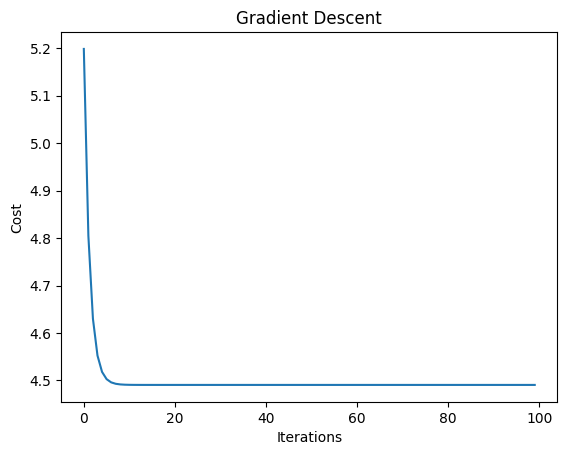

In [73]:
plt.plot(iterations, cost)
plt.title("Gradient Descent")
plt.xlabel("Iterations")
plt.ylabel("Cost")

### Fitting Line

In [77]:
import numpy as np
m = x.shape[0]
prediction = np.zeros(m)
for i in range(m):
    prediction[i] = w*df["x"][i]+b

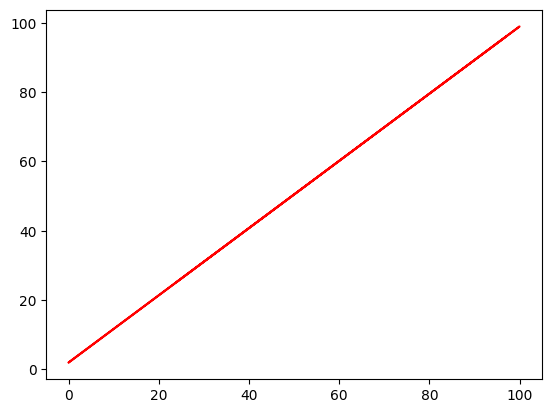

In [78]:
plt.plot(df["x"], prediction, c = 'red')

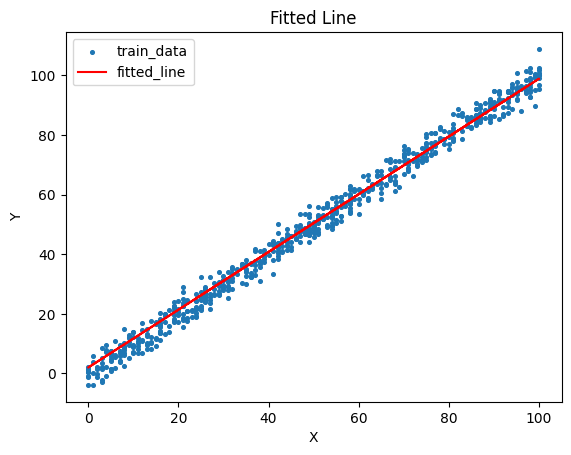

In [80]:
plt.scatter(df["x"], df["y"], s = 7, label ="train_data")
plt.plot(df["x"], prediction, c="red", label="fitted_line")
plt.title("Fitted Line")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [81]:
test = pd.read_csv("test.csv")

In [82]:
test.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [83]:
test.shape

(300, 2)

In [84]:
n = test.shape[0]
test_prediction = np.zeros(n)
for i in range(n):
    test_prediction[i] = w*test["x"][i]+b

In [85]:
test_prediction[5]

np.float64(16.536288933718065)

## Model Evaluation

#### Mean-Squared Error

In [91]:
mse = 0
for i in range(n):
    mse = mse + (test["y"][i] - test_prediction[i])**2
mse = mse/n
print("MSE: ", mse)

MSE:  10.846785590939673


#### R-Squared Accuracy

In [96]:
err_n = 0
err_d = 0
y_mean = np.mean(test["y"])
print("y mean: ",y_mean)
for i in range(n):
    err_n = err_n + (test["y"][i] - test_prediction[i])**2
    err_d = err_d + (test["y"][i] - y_mean)**2

error = 1-(err_n/err_d)
print("Model Accuracy: ", error*100)

y mean:  51.20505109827666
Model Accuracy:  98.71229372305619
